# Exemplo 1

N = 3, error at midpoint = 0.005372990181821427
N = 7, error at midpoint = 0.001312184986912962
N = 15, error at midpoint = 0.00032614928717146496
N = 31, error at midpoint = 8.141944162226578e-05
N = 63, error at midpoint = 2.034750345958347e-05
N = 127, error at midpoint = 5.086416220254075e-06


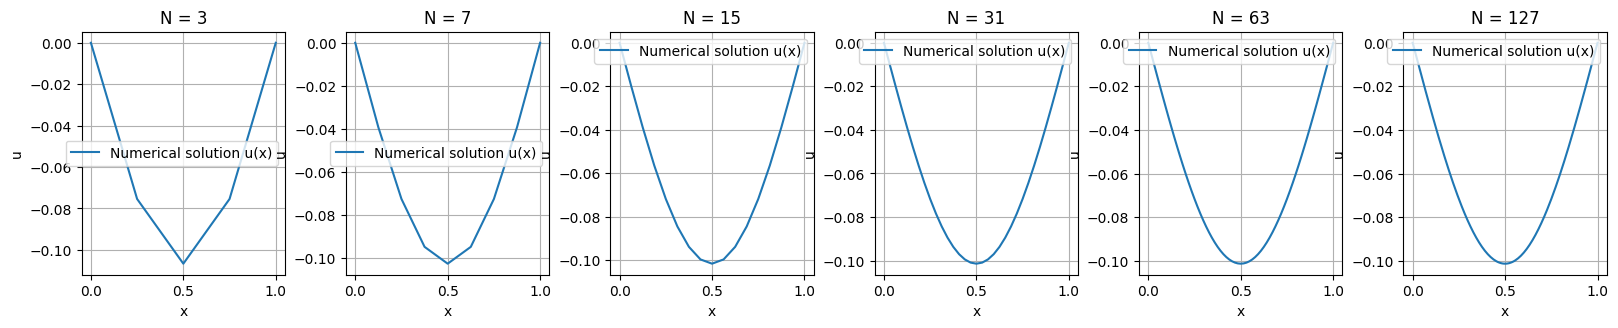

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return np.sin(np.pi * x)

exact_solution = lambda x: - np.sin(np.pi * x) / (np.pi**2)
sol_midpoint = exact_solution(0.5)


N_i = [3, 7, 15, 31, 63, 127]  # List of numbers of internal points, endpoints excluded

fig, axs = plt.subplots(1, 6, figsize=(16, 3))  # Create a figure with one subplot
fig.tight_layout(pad=1.0)  # Set spacing between plots
midpoints = np.zeros(len(N_i))  # Initialize array for midpoints

for i, N in enumerate([3, 7, 15, 31, 63, 127]):
    
    h = 1 / (N + 1)  # Step size, with N+1 intervals total

    # Define the x values at the internal points (exclude the first and the last point, which are boundaries)
    x_internal = np.linspace(h, 1 - h, N)

    # Construct the matrix A for the internal points
    A = -(2 * np.eye(N) - np.eye(N, k=-1) - np.eye(N, k=1))

    # Construct the vector f for the internal points
    f_internal = h**2 * np.sin(np.pi * x_internal)

    # Solve the linear system Au = f for the internal points
    u_internal = np.linalg.solve(A, f_internal)

    # Include the boundary values in the solution vector by adding zeros at the beginning and end
    u = np.concatenate(([0], u_internal, [0]))

    # Include the boundary points in the x vector
    x = np.concatenate(([0], x_internal, [1]))
    # print(x[(N+1)//2])
    # print(u[(N+1)//2])
    # Print error between numerical solution at midpoint and exact solution at midpoint
    print('N = {}, error at midpoint = {}'.format(N, abs(u[(N+1)//2] - sol_midpoint)))
    # Plot the solution for this N
    axs[i].plot(x, u, label='Numerical solution u(x)')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('u')
    axs[i].set_title('N = {}'.format(N))
    axs[i].legend()
    axs[i].grid(True)

# Exemplo 2

#### Plot da solução analítica

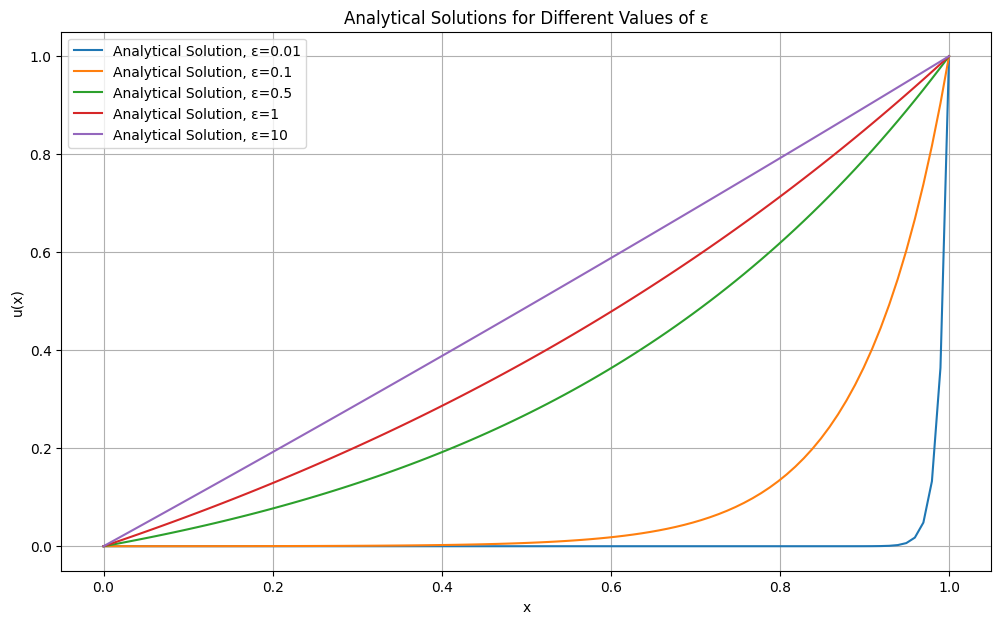

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the analytical solution
def u_analytical(x, epsilon):
    return (np.exp(x / epsilon) - 1) / (np.exp(1 / epsilon) - 1)

# Define the range of epsilon values
# epsilon_values = np.linspace(1e-4, 10, 5)
epsilon_values = [0.01, 0.1, 0.5, 1, 10]

# Define the x range
x_values = np.linspace(0, 1, 100)

# Plot the analytical solutions for different values of epsilon
plt.figure(figsize=(12, 7))
for epsilon in epsilon_values:
    plt.plot(x_values, u_analytical(x_values, epsilon), label=f'Analytical Solution, ε={epsilon}')

plt.title('Analytical Solutions for Different Values of ε')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()


#### Cálculo da solução numérica (diferença central)

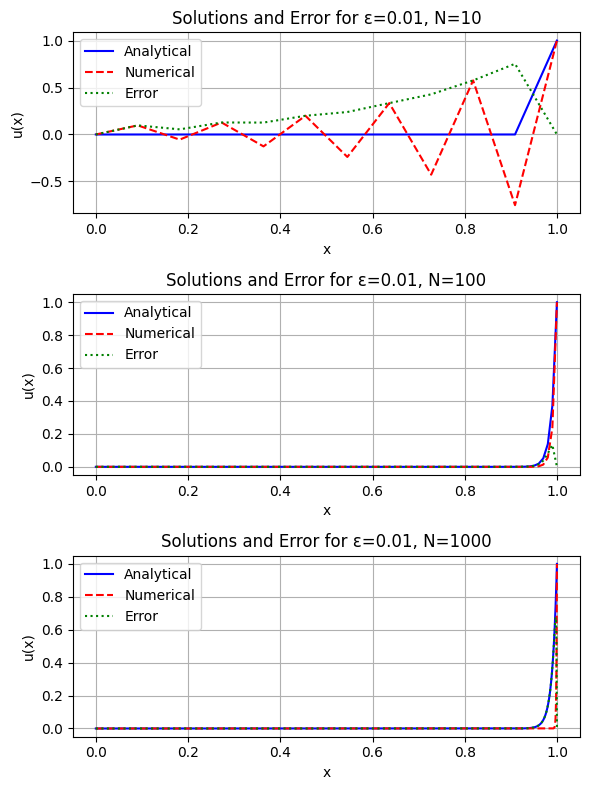

In [14]:
# Define the numerical solution using some discretization scheme
def u_numerical(N, epsilon, A_gen, b_b, b_a = 0):

    h = 1 / (N +1)  # Step size, with N+1 intervals total
    b = np.zeros(N)  # Vector b for the interior points

    # Construct matrix A using a discretization scheme
    A = A_gen(epsilon, N, h)

    # Apply the right boundary condition to the last element of b
    b[-1] = b_b(epsilon, N, h)  

    # Solve the linear system
    u_interior = np.linalg.solve(A, b)

    # Construct the full solution, including the boundary points
    u_full = np.concatenate(([0], u_interior, [1]))

    return u_full

# Set the number of points and epsilon values
# Define a list with the number of interior points to use
N_i = [10, 100, 1000]
epsilon = 0.01

A_gen_central_diff = lambda epsilon, N, h: 4* epsilon * np.eye(N) + (h - 2*epsilon)*np.eye(N, k=1) - (h - 2*epsilon)*np.eye(N, k=-1)
boundary_b = lambda epsilon, N, h: -(h-2*epsilon) * 1
# Prepare the plot
plt.figure(figsize=(6, 8))

# Plot analytical and numerical solutions for each N_i
for index, N in enumerate(N_i):
    x_values = np.linspace(0, 1, N+2)  # x values including the boundary points
    y_analytical = u_analytical(x_values, epsilon)  # Analytical solution
    y_numerical = u_numerical(N, epsilon, A_gen_central_diff, boundary_b)  # Numerical solution

    # Plot analytical solution
    plt.subplot(len(N_i), 1, index + 1)
    plt.plot(x_values, y_analytical, label='Analytical', color='blue')

    # Plot numerical solution
    plt.plot(x_values, y_numerical, label='Numerical', linestyle='--', color='red')

    # Plot error
    plt.plot(x_values, np.abs(y_analytical - y_numerical), label='Error', color='green', linestyle=':')

    plt.title(f'Solutions and Error for ε={epsilon}, N={N}')
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()



#### Cálculo da solução numérica (backward difference)

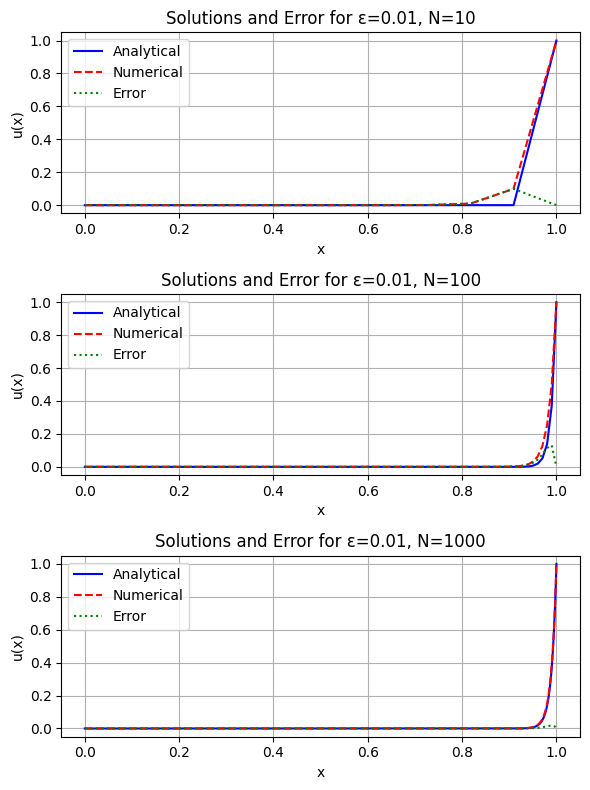

In [15]:
# Define a list with the number of interior points to use
N_i = [10, 100, 1000]
epsilon = 0.01

# Define the matrix for the coefficients to be found using backward difference
A_gen_back_diff = lambda epsilon, N, h: (2* epsilon + h) * np.eye(N) -epsilon * np.eye(N, k=1) - (epsilon + h)*np.eye(N, k=-1)
# Rightmost boundary
boundary_b = lambda epsilon, N, h: epsilon * 1

# Prepare the plot
plt.figure(figsize=(6, 8))

# Plot analytical and numerical solutions for each N_i
for index, N in enumerate(N_i):
    x_values = np.linspace(0, 1, N+2)  # x values including the boundary points
    y_analytical = u_analytical(x_values, epsilon)  # Analytical solution
    y_numerical = u_numerical(N, epsilon, A_gen_back_diff, boundary_b)  # Numerical solution

    # Plot analytical solution
    plt.subplot(len(N_i), 1, index + 1)
    plt.plot(x_values, y_analytical, label='Analytical', color='blue')

    # Plot numerical solution
    plt.plot(x_values, y_numerical, label='Numerical', linestyle='--', color='red')

    # Plot error
    plt.plot(x_values, np.abs(y_analytical - y_numerical), label='Error', color='green', linestyle=':')

    plt.title(f'Solutions and Error for ε={epsilon}, N={N}')
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

